# [`sklearn.mixture`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.mixture "sklearn.mixture").GaussianMixture[¶](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn-mixture-gaussianmixture "Permalink to this heading")

_class_ sklearn.mixture.GaussianMixture(_n_components=1_,  _*_,  _covariance_type='full'_,  _tol=0.001_,  _reg_covar=1e-06_,  _max_iter=100_,  _n_init=1_,  _init_params='kmeans'_,  _weights_init=None_,  _means_init=None_,  _precisions_init=None_,  _random_state=None_,  _warm_start=False_,  _verbose=0_,  _verbose_interval=10_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/mixture/_gaussian_mixture.py#L457)[](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture "Permalink to this definition")

Parameters:

**n_components**int, default=1

The number of mixture components.

**covariance_type**{‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’

String describing the type of covariance parameters to use. Must be one of:

-   ‘full’: each component has its own general covariance matrix.
    
-   ‘tied’: all components share the same general covariance matrix.
    
-   ‘diag’: each component has its own diagonal covariance matrix.
    
-   ‘spherical’: each component has its own single variance.
    

**tol**float, default=1e-3

The convergence threshold. EM iterations will stop when the lower bound average gain is below this threshold.

**reg_covar**float, default=1e-6

Non-negative regularization added to the diagonal of covariance. Allows to assure that the covariance matrices are all positive.

**max_iter**int, default=100

The number of EM iterations to perform.

**n_init**int, default=1

The number of initializations to perform. The best results are kept.

**init_params**{‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’}, default=’kmeans’

The method used to initialize the weights, the means and the precisions. String must be one of:

-   ‘kmeans’ : responsibilities are initialized using kmeans.
    
-   ‘k-means++’ : use the k-means++ method to initialize.
    
-   ‘random’ : responsibilities are initialized randomly.
    
-   ‘random_from_data’ : initial means are randomly selected data points.
    

Changed in version v1.1: `init_params`  now accepts ‘random_from_data’ and ‘k-means++’ as initialization methods.

**weights_init**array-like of shape (n_components, ), default=None

The user-provided initial weights. If it is None, weights are initialized using the  `init_params`  method.

**means_init**array-like of shape (n_components, n_features), default=None

The user-provided initial means, If it is None, means are initialized using the  `init_params`  method.

**precisions_init**array-like, default=None

The user-provided initial precisions (inverse of the covariance matrices). If it is None, precisions are initialized using the ‘init_params’ method. The shape depends on ‘covariance_type’:

(n_components,)                        if 'spherical',
(n_features, n_features)               if 'tied',
(n_components, n_features)             if 'diag',
(n_components, n_features, n_features) if 'full'

**random_state**int, RandomState instance or None, default=None

Controls the random seed given to the method chosen to initialize the parameters (see  `init_params`). In addition, it controls the generation of random samples from the fitted distribution (see the method  `sample`). Pass an int for reproducible output across multiple function calls. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**warm_start**bool, default=False

If ‘warm_start’ is True, the solution of the last fitting is used as initialization for the next call of fit(). This can speed up convergence when fit is called several times on similar problems. In that case, ‘n_init’ is ignored and only a single initialization occurs upon the first call. See  [the Glossary](https://scikit-learn.org/stable/glossary.html#term-warm_start).

**verbose**int, default=0

Enable verbose output. If 1 then it prints the current initialization and each iteration step. If greater than 1 then it prints also the log probability and the time needed for each step.

In [3]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','patal_length','petal_width']

iris_df = pd.DataFrame(iris.data,columns=feature_names)
iris_df['target'] = iris.target

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,random_state=0)
gmm.fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

iris_df['gmm_cluster'] = gmm_cluster_labels

iris_result = pd.crosstab(iris_df['target'],iris_df['gmm_cluster'])
print(iris_result)

gmm_cluster   0   1   2
target                 
0            50   0   0
1             0   5  45
2             0  50   0


C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
# 클러스터 결과를 시각화

def visualize_cluster_plot(clusterobj,dataframe,label_name,iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o','s','^','x','*']
    iscenter =False
    
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_lagend = 'Noise'
            isNoise=True
        else :
            cluster_lagend = 'Cluster'+str(label)

        # 군집별로 다른 마커로 산점도 적용
        plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],marker=markers[label],label=cluster_lagend)

        # 군집별 중심 표현
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
            plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='gray',edgecolors='k',marker='$%d$' % label)
    
    plt.show()

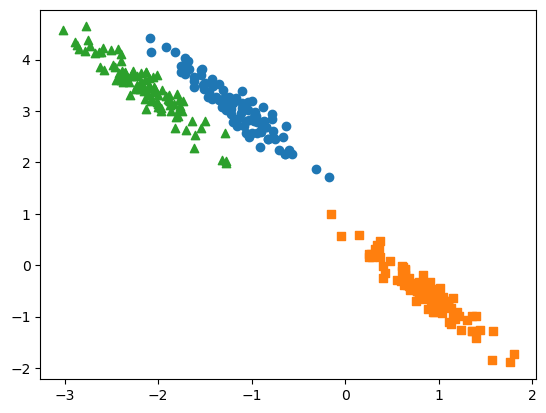

In [21]:
from sklearn.datasets import make_blobs

x ,y = make_blobs(n_features=2,n_samples=300,centers=3,cluster_std=0.5,random_state=0)

transformation = [[0.6083,-0.63366],[-0.4088,0.8525]]
x_aniso = np.dot(x,transformation)

cluster_df = pd.DataFrame(x_aniso,columns=['ftr1','ftr2'])
cluster_df['target'] = y

visualize_cluster_plot(None,cluster_df,'target',iscenter=False)

C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


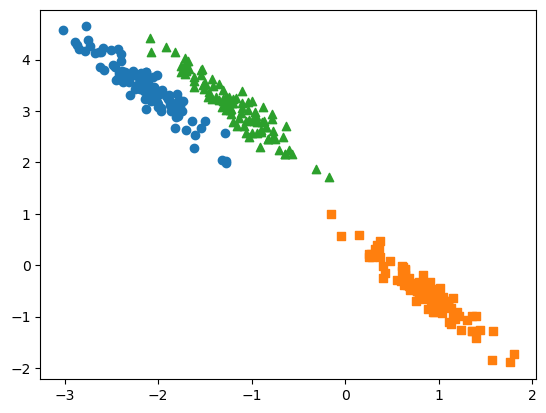

In [23]:
gmm = GaussianMixture(n_components=3,random_state=0)
gmm_label = gmm.fit(x_aniso).predict(x_aniso)
cluster_df['gmm_label'] =gmm_label
visualize_cluster_plot(gmm,cluster_df,'gmm_label',iscenter=False)